# Project

Machine Learning

Winter 2023/24

by James Connolly (G00232918)

***

## Table of Contents

## Supervised Learning

Supervised learning, also known as supervised machine learning, is a subcategory of machine learning and artificial intelligence. It is defined by its use of labelled datasets to train algorithms that to classify data or predict outcomes accurately. The training data is processed based on the input objects and a desired output value train a model.

Supervised Learning can be separated into 2 types of problems when data mining, which are classification and regression:
* Classification uses the algorithm to accurately assign test data info specific categories. What these type of algorithms do is recognise the entities and draw conclusions what the entities should be labelled or defined.

* Regression is used to understand the relationship between dependent and independent variables. (Indeed Career Guide, 2022)

Both classification and regression methods can be applied to the Iris dataset due the features the Iris flower has. Further on in the project I will explain the features and will compare the different algorithms applied to the dataset.
 
Supervised Learning examples -

* Image and object recognition - Used to locate, categorise and isolate objects from images and videos. Based off the objects identified the SL can identify what exactly is being seen.

* Predictive analysis -This is done using all data details, for example predicting the price of something where you read in all the parameters from a large dataset, allowing you then to predict.

* Sentiment analysis - This type of analysis is used mostly in e-commerce when the companies can use cookies to see what the customers are interacting with and also reviews that are posted on products.. Based off this information the company will try to gain insight and needs of the customers to try to engage them with offers or content. (Indeed Career Guide, 2022)



# Iris Dataset

The Iris flower dataset can or also known as Fishers Iris dataset, made famous by the British statiscian and biologist Ronald Fisher in his 1936 paper. 

The Iris dataset consists of 50 samples from the following 3 sepcies Iris Setosa, Iris Virginia and Iris Versicolor. The 4 four features that were measured where the length and width of the sepals and the same for the petals.

The dataset has become a typical test for many statiscal classifcation and machine learning techniques which will be reviewed in this project. (Wikipedia Contributors, 2019)

# Data analysis of the Iris dataset

I will review the Iris dataset giving an overview of the key aspects and relationships between the variables with Python. I intend to give a comprehensice exploration of the dataset by reviewing the data, providing visualisation and statistical analysis.

In [72]:
# imports that I will be using to review the data

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris
import time

In [73]:
# import the Iris dataset for review

df = pd.read_csv("data/iris.csv")
print (df)

     sepal_length  sepal_width  petal_length  petal_width      class
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [74]:
# as per best practice when reviewing any dataset it is important to check for null values

print(df.isna().sum())


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


In [75]:
# check the data is accurate by pulling up the first 10 lines
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [76]:
# check the last 10 lines
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [77]:
# get the data types and information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [78]:
# summary of the statistics from pandas
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


From the overall results you can see each feature has 150 data points. 

Summary for each part of the Iris:

For the sepal length the approximate length is 5.84cms. The data point range is from a minimum of 4.3cms to maximum of 7.9 units. 50% of the data points in sepal length are less than or equal to the mean.

For the sepal width it is approximately 3.05cms. The data point range us from a minimum of 2cms to a maximum of 4.4cms. 50% of the data points here also are less than than or equal to the mean.

For the average petal length it is approximately 3.76 cms. The data points range is from a minimum of 1.0cms to a maximum of 6.9cms. 50% of the data have petal lengths less than or equal to 4.35cms.

For the average petal width is approximately 1.20cms. The data points range from a minimum of 0.1cms to a maximum of 2.5ms. 50% of the data have petal widths less than or equal to 1.3cms. These dimensions show that this part of the Iris of the flower is the smallest.

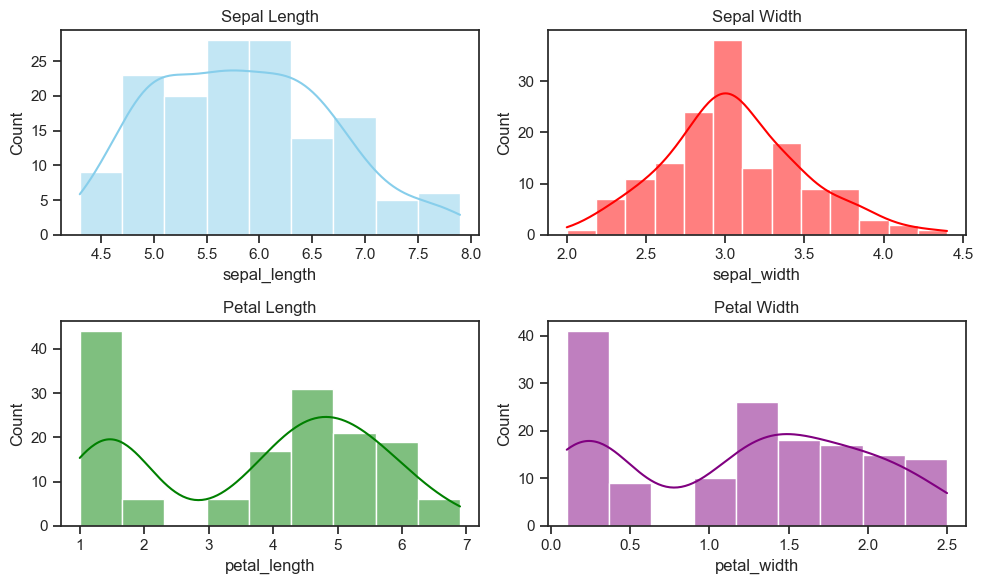

In [79]:
# Visualising the Iris Dataset
# Histogram

# Create subplots for each feature
# reference for subplot - (“Matplotlib.pyplot.subplots — Matplotlib 3.6.0 Documentation”)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# Plotting each feature on its own subplot
# reference for hisplot - (Bell)
sns.histplot(df["sepal_length"], kde=True, color="skyblue", ax=axes[0, 0])
axes[0, 0].set_title('Sepal Length')

sns.histplot(df["sepal_width"], kde=True, color="red", ax=axes[0, 1])
axes[0, 1].set_title('Sepal Width')

sns.histplot(df["petal_length"], kde=True, color="green", ax=axes[1, 0])
axes[1, 0].set_title('Petal Length')

sns.histplot(df["petal_width"], kde=True, color="purple", ax=axes[1, 1])
axes[1, 1].set_title('Petal Width')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


		

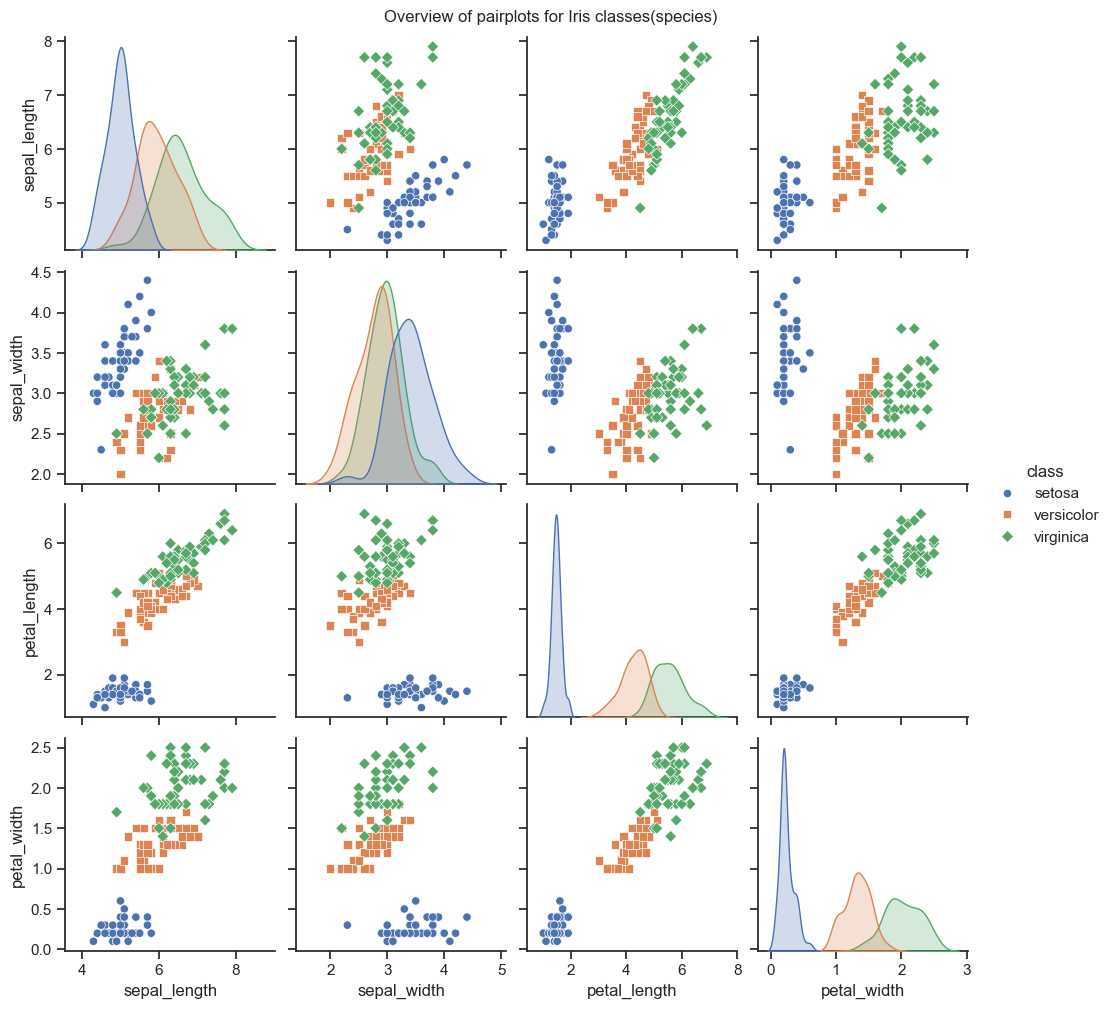

In [80]:
# Seaborn pairplot

# reference for pairplot - (seaborn.pydata.org, n.d.)
sns.set(style="ticks")
# reference for marker - (seaborn.pydata.org, n.d.)
g = sns.pairplot(df, hue="class", markers=["o", "s", "D"])

# Adding a header text
# (“Matplotlib.pyplot.text — Matplotlib 3.5.2 Documentation”)
plt.text(0.5, 1.0, "Overview of pairplots for Iris classes(species)", ha='center', va='center', transform=g.fig.transFigure)
plt.show()


This visualisation from the pairplot confirms the insights that I had summarised from the code describing the data. There is many different relationshups from the plots but the Setosa has the smallest sepal length but larger sepal widths. 

Text(0.5, 0.98, 'Iris Dataset Heatmap')

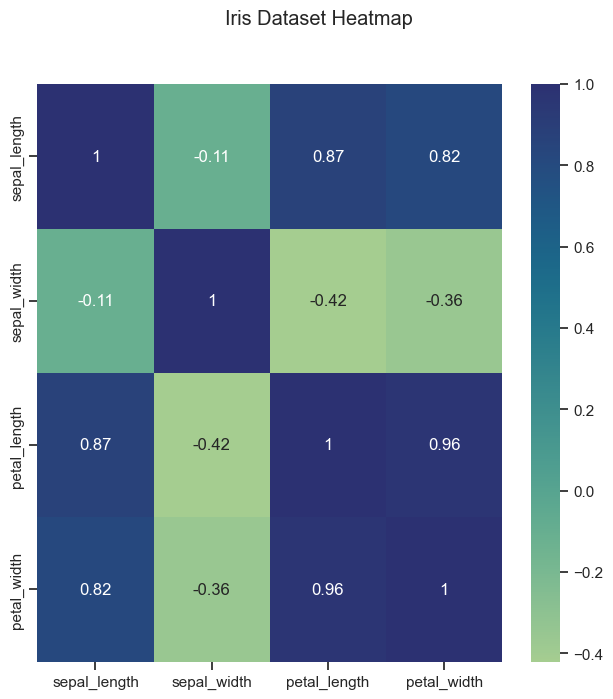

In [81]:
# Heatmap
# code reference - previous project
plt.figure(figsize=(7.5,7.5))
numeric_data = df.select_dtypes(include='number')
sns.heatmap(numeric_data.corr(), cmap='crest', annot=True)
plt.suptitle ("Iris Dataset Heatmap")

From the above graph, we can see that –

Petal width and petal length show a strong positive correlation (r = 0.96), indicating that as the petal width increases, the petal length tends to increase as well. This suggests that these two features tend to vary together consistently and are highly related.

Petal width and sepal length also display a moderate positive correlation (r = 0.82). This suggests that as the petal width increases, the sepal length tends to increase as well. 

The r-value is from the Pearson correlation cofficient which measures linear corraction. The rating is based on a number between -1 and 1, closer to 1 meaning ther is a strength in the relationship and -1, less strength.(Turney)



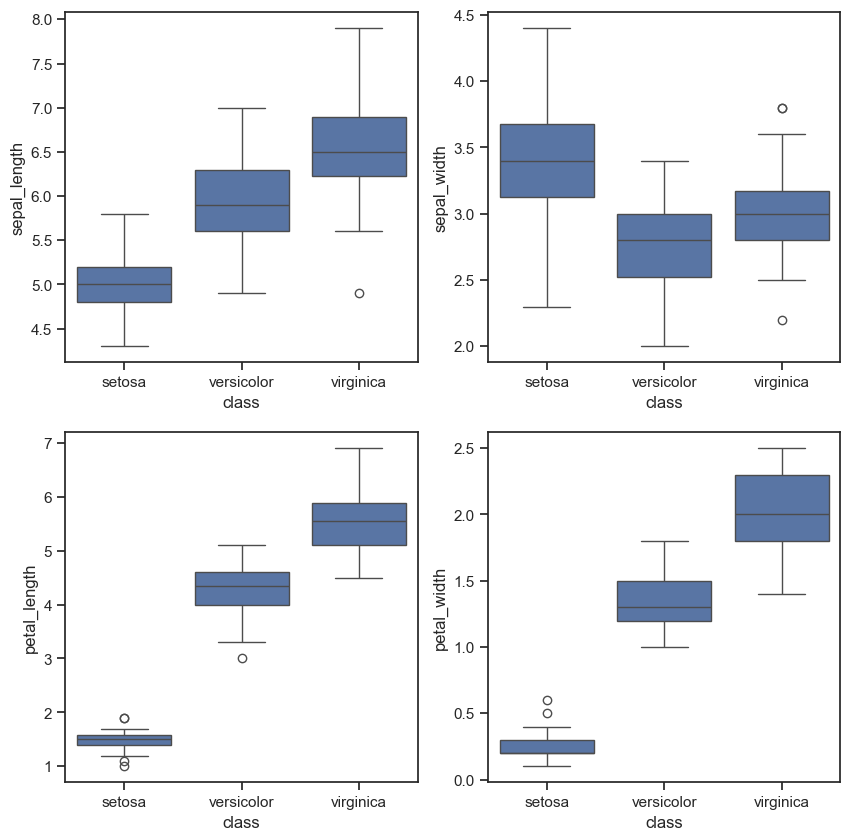

In [82]:
# boxplot
# reference for boxplot - (“Exploratory Data Analysis on Iris Dataset”)
def graph(y):
    sns.boxplot(x="class", y=y, data=df)
 
plt.figure(figsize=(10,10))
     
# grid position
plt.subplot(221)
graph('sepal_length')
 
plt.subplot(222)
graph('sepal_width')
 
plt.subplot(223)
graph('petal_length')
 
plt.subplot(224)
graph('petal_width')
 
plt.show()

From the boxplot it gives us the visualisation of where the outliers which are in the Setosa variable. You can see in Petal length and Petal Width boxplot. When using the classification algorithms I will have decide how I will deal with these when doing the calculations. 

# Classification Algorithms

A classification algorithm is a Supervised Learning which is isused to identity the category of new observation or trends on the basis of traning data. Classification learns from the given dataset and makes the classification into classes or group. A simple example would classifying a dataset into two groups which would be a Yes or No. (www.javatpoint.com, n.d.)

In classification it is important that different related algorithms to this topic have different approaches. There is eager learners and lazy learners.Eager learners are acine Learning algorithms that first build model from the training dataset making predictions on future datasets. So they spend more time in the learning phase making it quicker to make predictions. Examples of this are Logistic Regression, Support Vector Machine, Decision Tree and Artificial Neural Networks.

On the other hand there is Lazy Learners that does not create a model immediately from the training data. They effectively memorise the traning dataset. Each time there  is a prediction they search for the nearest neighbour which can be a slower process for larger datasets. (Keita, 2022)

I will firstly give an overview of the strengths and weaknesses of the algorithms that will be tested. After this,I will summarise the performance of each that will be compared to find the best algorithm for the Iris dataset.

## XGBoost

XG boost is a decision-tree based Machine Learning algorithm which used a gradient boosting framework. So the XGboost is a more powerful version gradient boosting as both use Decision Trees which are made up of binary questions and the final predictions happen at the leaf. (Wikipedia Contributors, 2019)

Boosting is to attempt to build a strong classifier from a number of weak classifiers. With boosting it begins by building the first made which is from the training data. Then from this first model, the second model is built by correcting the errors. This procedure is continued in the complete training data is predicted correctly.

XG boost uses Cross-Validation as its evaluation process. In this process it estimates the unseen data by generating many non-overlapping train/test splits into training data and reporting the average test set performance across all data splits. (Seif, 2019)

XG Boost is used on larger datasets that have more than 1000 training samples, that have less than 100 features. So really compared to the Gradient Boosting, its main difference is that it can work quicker through larger datasets.

## Random Forest

Random forest builds a multitude decision trees from different samples at training times, then takes the majority vote for the classification and in the case of regression it takes the average vote. (analyticsvidhya) A decision tree is really a question posed and then you have a choice of yes or no. Decision trees are sensitive to the training data, one change to the data, can change the leafs in the decision tree completely. Random forests will generally perform better than decision trees but their accuracy can be lower than gradient boosted trees.(Wikipedia Contributors, 2019b)

In the study, Random Forest will take more processing time, as the decision trees will have to be created so the algorithm will have to parse through the data. With Random Forest will reduce the risk of overfitting as there will be a robust number of decision trees, which will get the average, therefore lead to less errors.

Random forest is used in Finance, as it allows businesses to spend less time on data management and pre-preprocessing tasks. Customers who have a high credit risks can be evaluated. (www.ibm.com, n.d.)

## K-nearest Neighbours Algorithm (KNN)

Based on the size of the data input I am going to use K-nearest Neighbours Algorithm. It can be used for both classification and regression problems in data analysis. This is a supervised machine learning algorithm which relies on the input data which is labelled. With the Wisconsin Breast Original dataset, this has the attributes labelled and is not a very big dataset. The KNN Algorithm has been known to be very trustworthy and reliable. 

Also the KNN algorithm is a non-parametric algorithm which mains it makes no assumptions about the data until it reviews it. For example Linear Regression can only be used on Linear data so with the algorithm I have chosen, it will not be restricted.

Based off the dataset I will be reviewing, I think these characteristics are suited to this dataset. With the dataset being defined already, the algorithm can make the assumptions more easily.

For KNN classification, the point is classified based on the the neighbour types. The data point is assigned for the most frequent class to K nearest neighbours. For the KNN regression, it is the average of the K nearest neighbors. 

A classification problem has a discrete value as its output. For example you ask a question with yes or no as the possible answers. No in between, the answers are described as discrete. For regression this takes an example which is a row in a dataset. You can have for example height and weight, you then set an independent variable and you have a dependent variable. What KNN does in this case if they find similar input they will class it as neighbour rather than trying to understand the data structure like unsupervised learning. (Harrison, 2018)

Setting the target variable is setting the variable that you want to understand from clearly. For this dataset it is clear from the start that Diagnosis is the target to find out is the Diagnosis Benign or Malignent.

## Naive Bayes

Naive Bayes is a probabilistic algorithm, that is used for classification problems such as the dataset we are analysing. The algorithm is based on probablibilty of an event occurring given that another another event has occurred, this is also known as Conditional probability. (Singh, 2021)

In this analysis I will be using the Gaussian version but all versions will have the same characteristics when classifying.It is the assumption that all predictors contribute equally and independtly to slecting the output class. In the real world it is hard for all predictors to be equal.

How the algorithm works is that the dataset is broken into two parts, which are the feature matrix and the response vector. The feature matrix takes all the rows and categorised into dependent features. The response vector is the class which is diagnosis from the dataset we are analysing. (Kumar, 2019)

For the example here, the variables won't really rely on each other. But they will be independent of each other and when this algorithm goes to work it is quite successful. 

# Training and evaluating the reviewed models

## Preprocessing of the Iris dataset

Data Preprocessing is a crucial step where raw data undergoes transformation and encoding to a format that is easily interpretable by the algorithms. This process enhances the algorithm's ability to parse and analyze the features within the data. The key methodologies employed in data preprocessing include:

Data Encoding involves converting categorical data into numerical form, allowing algorithms to work with non-numeric data types effectively which is common practice in industry when using Python.

By incorporating this preprocessing technique, the machine learning model can more effectively learn from the data, improving its performance in classification tasks. This ensures that the features are appropriately represented, contributing to the overall accuracy and reliability of the model's predictions. (Patel, 2021)


In [84]:
# load the Iris dataset
iris = load_iris()

# df created
df_iris = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# preprocess the data
# (Patel, 2021)
X = df_iris.drop(['target'], axis=1)
y = df_iris['target']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


# (Samariya, 2021)
# building the models
np.random.seed(1000)

# list of classification models
models = [
    ('Ran_For', RandomForestClassifier(random_state=42)),
    ('SVMe', SVC(random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('XGBoost', XGBClassifier(random_state=42, use_label_encoder=False)),
    ('Naive Bayes', GaussianNB())
]

# lists to store performance data
model_names = []
accuracies = []
cv_accuracies = []
train_times = []
precision_list = []
recall_list = []
f1_list = []
support_list = []

def classification_Models(xtrain, xtest, ytrain, ytest):
    for name, model in models:
        # cross-validation
        v_results = cross_val_score(model, xtrain, ytrain, cv=3, scoring='accuracy', n_jobs=-1, verbose=0)
        acc_mean = v_results.mean()

        # train the data and get the measure times of how long it takes
        start_time = time.time()
        trained_model = model.fit(xtrain, ytrain)
        end_time = time.time()
        train_time = end_time - start_time

        # predicting the test date with the accuracy score
        y_predict = trained_model.predict(xtest)
        acc_test = accuracy_score(ytest, y_predict)

        # classification report
        class_report = classification_report(ytest, y_predict, target_names=iris.target_names, output_dict=True)

        # appending each result for the models into lists
        model_names.append(name)
        accuracies.append(acc_test)
        cv_accuracies.append(acc_mean)
        train_times.append(train_time)
        precision_list.append(class_report['weighted avg']['precision'])
        recall_list.append(class_report['weighted avg']['recall'])
        f1_list.append(class_report['weighted avg']['f1-score'])
        support_list.append(class_report['weighted avg']['support'])

# display model accuracies
classification_Models(X_train, X_test, y_train, y_test)

# create a DataFrame for the results of the predictions
performance_data = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'CV Accuracy': cv_accuracies,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1-Score': f1_list,
    'Support': support_list,
    'Train Times': train_times
})

# print the results table
print(performance_data)




         Model  Accuracy  CV Accuracy  Precision  Recall  F1-Score  Support  \
0      Ran_For       1.0     0.950000        1.0     1.0       1.0     30.0   
1         SVMe       1.0     0.958333        1.0     1.0       1.0     30.0   
2          KNN       1.0     0.925000        1.0     1.0       1.0     30.0   
3      XGBoost       1.0     0.941667        1.0     1.0       1.0     30.0   
4  Naive Bayes       1.0     0.941667        1.0     1.0       1.0     30.0   

   Train Times  
0     0.362490  
1     0.000000  
2     0.000000  
3     0.094950  
4     0.003254  


## Result Summary:

* The shape of the training set (X_train) is (120, 4), indicating 120 samples with 4 features each.
* The shape of the test set (X_test) is (30, 4), indicating 30 samples with 4 features each.

The use of this method works well when working with algorithms that expect numerical input for the target variable. Sometimes it may not lead to better performance but it promote consisitency for data representation. For costing it allows for less memory rather than having to store categorical labels as srings.

As you can see from the review of the different classifications and results I used th following as the models - Random Forest (Ran_For), Support Vector Machine (SVM), K-Nearest Neighbors (KNN), XGBoost (XGBoost), and Naive Bayes (Naive Bayes).

For the performance metrics you see that that all the models scored perfect accuracy (1.0) which indicates that the models are correctly classified. SVM and KNN have slightly lower cross validated accuracy than the other models. What this means is that these models will have challenges in capturing certain patterns in the data during cross validation due the lower score in Cross Validation accuracies.

Naive Bayes has the fastest training (0.0 seconds), indicating it is computationally efficient.




# Conclusion

# References
* IBM (n.d.). What is Supervised Learning? | IBM. [online] www.ibm.com. Available at: https://www.ibm.com/topics/supervised-learning#:~:text=the%20next%20step- [Accessed 10 Nov. 2023].
* Indeed Career Guide. (2022). Supervised Machine Learning Examples (And How It Works). [online] Available at: https://in.indeed.com/career-advice/career-development/supervised-machine-learning-examples [Accessed 10 Nov. 2023].
* Wikipedia Contributors (2019). Iris flower data set. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Iris_flower_data_set [Accessed 20 Oct. 2023].
* matplotlib.org. (n.d.). matplotlib.pyplot.subplots — Matplotlib 3.6.0 documentation. [online] Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html [Accessed 5 Nov. 2023].
* seaborn.pydata.org. (n.d.). seaborn.pairplot — seaborn 0.10.1 documentation. [online] Available at: https://seaborn.pydata.org/generated/seaborn.pairplot.html [Accessed 4 Nov. 2023].
* matplotlib.org. (n.d.). matplotlib.pyplot.text — Matplotlib 3.5.2 documentation. [online] Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html.
* seaborn.pydata.org. (n.d.). Properties of Mark objects — seaborn 0.13.0 documentation. [online] Available at: https://seaborn.pydata.org/tutorial/properties.html#marker [Accessed 5 Nov. 2023].
* GeeksforGeeks. (2021). Exploratory Data Analysis on Iris Dataset. [online] Available at: https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/ [Accessed 5 Nov. 2023].
* Turney, S. (2022). Pearson Correlation Coefficient (r) | Guide & Examples. [online] Scribbr. Available at: https://www.scribbr.com/statistics/pearson-correlation-coefficient/#:~:text=What%20is%20the%20definition%20of [Accessed 5 Nov. 2023].
* www.javatpoint.com. (n.d.). Classification Algorithm in Machine Learning - Javatpoint. [online] Available at: https://www.javatpoint.com/classification-algorithm-in-machine-learning [Accessed 27 Dec. 2020].
* Keita, Z. (2022). Classification in Machine Learning: A Guide for Beginners. [online] www.datacamp.com. Available at: https://www.datacamp.com/blog/classification-machine-learning [Accessed 28 Dec. 2023].
* Wikipedia Contributors (2019). Gradient boosting. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Gradient_boosting. [Accessed 28 Dec. 2022]
* Seif, G. (2019). A Beginner’s guide to XGBoost. [online] Medium. Available at: https://towardsdatascience.com/a-beginners-guide-to-xgboost-87f5d4c30ed7. [Accessed 28 Dec. 2022]
* Seif, G. (2019). A Beginner’s guide to XGBoost. [online] Medium. Available at: https://towardsdatascience.com/ [Accessed 28 Dec. 2022]
*  Harrison, O. (2018). Machine Learning Basics with the K-Nearest Neighbors Algorithm. [online] Medium. Available at: https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761.
* Singh, S. (2021). Naive Bayes Algorithm - Explained. [online] www.linkedin.com. Available at: https://www.linkedin.com/pulse/naive-bayes-algorithm-explained-simranjeet-singh [Accessed 28 Dec. 2022].
* Kumar, N. (2019). Naive Bayes Classifiers - GeeksforGeeks. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/naive-bayes-classifiers/ [Accessed 28 Dec. 2023].
*Patel, J. (2021). Data science | Data Pre-processing using Scikit-learn| Iris dataset. [online] Medium. Available at: https://jay190301.medium.com/data-science-data-pre-processing-using-scikit-learn-iris-dataset-1ba0a9ae04e6 [Accessed 28 Dec. 2023].
* Samariya, D. (2021). Iris Flower Classification. [online] kaggle.com. Available at: https://www.kaggle.com/code/themlphdstudent/iris-flower-classification/notebook [Accessed 29 Dec. 2023].

